In [1]:
import  os
import tensorflow as tf
import  numpy as np
from matplotlib import pyplot as plt

In [3]:
tf.__version__


'2.7.0'

In [4]:
np.random.seed(333)
tf.random.set_seed(333)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
assert tf.__version__.startswith('2.'), "TensorFlow Version Below 2.0"

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train.astype(np.float32)/255., x_test.astype(np.float32)/255.

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


4431872/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


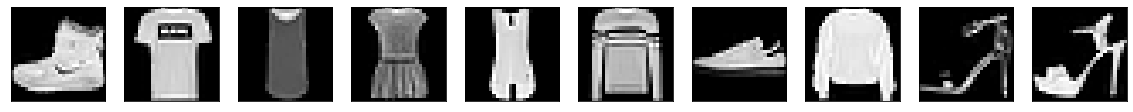

In [6]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_train[index], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
image_size = x_train.shape[1]*x_train.shape[2]
hidden_dim = 512
latent_dim = 10
num_epochs = 80
batch_size = 100
learning_rate = 0.001

In [8]:
image_size

784

In [28]:
class VAE(tf.keras.Model):

    def __init__(self,dim,**kwargs):
        h_dim = dim[0]
        z_dim = dim[1]
        super(VAE, self).__init__(**kwargs)

        self.fc1 = tf.keras.layers.Dense(h_dim)
        self.fc2 = tf.keras.layers.Dense(z_dim)
        self.fc3 = tf.keras.layers.Dense(z_dim)

        self.fc4 = tf.keras.layers.Dense(h_dim)
        self.fc5 = tf.keras.layers.Dense(image_size)

    def encode(self, x):
        h = tf.nn.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)

    def reparameterize(self, mu, log_var):
        std = tf.exp(log_var * 0.5)
        eps = tf.random.normal(std.shape)
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + eps * std

    
    def decode_logits(self, z):
        h = tf.nn.relu(self.fc4(z))
        return self.fc5(h)

    def decode(self, z):
        return tf.nn.sigmoid(self.decode_logits(z))

    def call(self, inputs, training=None, mask=None):
        mu, log_var = self.encode(inputs)
        z = self.reparameterize(mu, log_var)
        x_reconstructed_logits = self.decode_logits(z)

        return x_reconstructed_logits, mu, log_var

In [29]:
model = VAE([hidden_dim, latent_dim])
model.build(input_shape=(4, image_size))
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate)

Model: "vae_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             multiple                  401920    
                                                                 
 dense_6 (Dense)             multiple                  5130      
                                                                 
 dense_7 (Dense)             multiple                  5130      
                                                                 
 dense_8 (Dense)             multiple                  5632      
                                                                 
 dense_9 (Dense)             multiple                  402192    
                                                                 
Total params: 820,004
Trainable params: 820,004
Non-trainable params: 0
_________________________________________________________________


In [30]:
dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.shuffle(batch_size * 5).batch(batch_size)
num_batches = x_train.shape[0] // batch_size
num_batches

600

In [31]:
 for step, x in enumerate(dataset):
        
        x=tf.reshape(x,[-1,image_size])
        print(step,x)

0 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), dtype=float32)
1 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), dtype=float32)
2 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), dtype=float32)
3 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), dtype=float32)
4 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), 

267 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), dtype=float32)
268 tf.Tensor(
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.42352942 0.         0.        ]], shape=(100, 784), dtype=float32)
269 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), dtype=float32)
270 tf.Tensor(
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.     

569 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), dtype=float32)
570 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(100, 784), dtype=float32)
571 tf.Tensor(
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.23529412 0.23529412 0.01960784]
 [0.         0.         0.         ... 0.         0.         0.        ]], shape=(100, 784), dtype=float32)
572 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [

In [32]:
x = tf.reshape(x, [-1, image_size])

In [33]:
dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.shuffle(batch_size * 5).batch(batch_size)

num_batches = x_train.shape[0] // batch_size

for epoch in range(num_epochs):

    for step, x in enumerate(dataset):

        x = tf.reshape(x, [-1, image_size])

        with tf.GradientTape() as tape:

            # Forward pass
            x_reconstruction_logits, mu, log_var = model(x)

            # Compute reconstruction loss and kl divergence
            reconstruction_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=x_reconstruction_logits)
            reconstruction_loss = tf.reduce_sum(reconstruction_loss) / batch_size
            kl_div = - 0.5 * tf.reduce_sum(1. + log_var - tf.square(mu) - tf.exp(log_var), axis=-1)
            kl_div = tf.reduce_mean(kl_div)
            # below is the loss function in pytorch
#             def loss_function(x_hat, x, mu, logvar):
#             BCE = nn.functional.binary_cross_entropy(
#             x_hat, x.view(-1, 784), reduction='sum'
#             )
#             KLD = 0.5 * torch.sum(logvar.exp() - logvar - 1 + mu.pow(2))

#             return BCE + KLD
            # Backprop and optimize
            loss = tf.reduce_mean(reconstruction_loss) + kl_div

        gradients = tape.gradient(loss, model.trainable_variables)
        for g in gradients:
            tf.clip_by_norm(g, 15)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        if (step + 1) % 50 == 0:
            print("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}"
                  .format(epoch + 1, num_epochs, step + 1, num_batches, float(reconstruction_loss), float(kl_div)))

Epoch[1/80], Step [50/600], Reconst Loss: 309.3014, KL Div: 13.5767
Epoch[1/80], Step [100/600], Reconst Loss: 269.4175, KL Div: 14.3903
Epoch[1/80], Step [150/600], Reconst Loss: 263.7549, KL Div: 14.2828
Epoch[1/80], Step [200/600], Reconst Loss: 261.5145, KL Div: 13.8820
Epoch[1/80], Step [250/600], Reconst Loss: 243.9095, KL Div: 14.4253
Epoch[1/80], Step [300/600], Reconst Loss: 255.9006, KL Div: 14.3238
Epoch[1/80], Step [350/600], Reconst Loss: 248.2702, KL Div: 14.3389
Epoch[1/80], Step [400/600], Reconst Loss: 256.9208, KL Div: 14.4362
Epoch[1/80], Step [450/600], Reconst Loss: 247.2606, KL Div: 13.6910
Epoch[1/80], Step [500/600], Reconst Loss: 244.9577, KL Div: 14.6875
Epoch[1/80], Step [550/600], Reconst Loss: 246.3092, KL Div: 14.3930
Epoch[1/80], Step [600/600], Reconst Loss: 239.5981, KL Div: 14.8546
Epoch[2/80], Step [50/600], Reconst Loss: 248.3782, KL Div: 14.5182
Epoch[2/80], Step [100/600], Reconst Loss: 238.7814, KL Div: 15.1672
Epoch[2/80], Step [150/600], Reconst

Epoch[10/80], Step [600/600], Reconst Loss: 230.4502, KL Div: 15.1428
Epoch[11/80], Step [50/600], Reconst Loss: 225.0378, KL Div: 15.7602
Epoch[11/80], Step [100/600], Reconst Loss: 226.4835, KL Div: 15.6922
Epoch[11/80], Step [150/600], Reconst Loss: 223.8817, KL Div: 16.3456
Epoch[11/80], Step [200/600], Reconst Loss: 222.2729, KL Div: 15.4341
Epoch[11/80], Step [250/600], Reconst Loss: 229.3329, KL Div: 14.5840
Epoch[11/80], Step [300/600], Reconst Loss: 219.9231, KL Div: 15.1882
Epoch[11/80], Step [350/600], Reconst Loss: 230.7899, KL Div: 14.9075
Epoch[11/80], Step [400/600], Reconst Loss: 235.1025, KL Div: 14.2945
Epoch[11/80], Step [450/600], Reconst Loss: 226.9586, KL Div: 15.5237
Epoch[11/80], Step [500/600], Reconst Loss: 233.1818, KL Div: 16.1791
Epoch[11/80], Step [550/600], Reconst Loss: 236.4845, KL Div: 16.0327
Epoch[11/80], Step [600/600], Reconst Loss: 231.4527, KL Div: 15.7655
Epoch[12/80], Step [50/600], Reconst Loss: 234.2590, KL Div: 16.2870
Epoch[12/80], Step [10

Epoch[20/80], Step [500/600], Reconst Loss: 232.1761, KL Div: 16.5360
Epoch[20/80], Step [550/600], Reconst Loss: 220.1272, KL Div: 15.4568
Epoch[20/80], Step [600/600], Reconst Loss: 234.8987, KL Div: 16.0206
Epoch[21/80], Step [50/600], Reconst Loss: 211.8151, KL Div: 15.7755
Epoch[21/80], Step [100/600], Reconst Loss: 209.5536, KL Div: 16.3218
Epoch[21/80], Step [150/600], Reconst Loss: 215.8867, KL Div: 15.8157
Epoch[21/80], Step [200/600], Reconst Loss: 221.1102, KL Div: 15.4649
Epoch[21/80], Step [250/600], Reconst Loss: 229.6574, KL Div: 15.4683
Epoch[21/80], Step [300/600], Reconst Loss: 224.7874, KL Div: 16.2078
Epoch[21/80], Step [350/600], Reconst Loss: 237.2558, KL Div: 15.6918
Epoch[21/80], Step [400/600], Reconst Loss: 237.9961, KL Div: 15.2129
Epoch[21/80], Step [450/600], Reconst Loss: 233.6619, KL Div: 15.5309
Epoch[21/80], Step [500/600], Reconst Loss: 242.5217, KL Div: 15.9100
Epoch[21/80], Step [550/600], Reconst Loss: 215.6354, KL Div: 15.8852
Epoch[21/80], Step [6

Epoch[30/80], Step [400/600], Reconst Loss: 220.1219, KL Div: 15.1585
Epoch[30/80], Step [450/600], Reconst Loss: 219.9140, KL Div: 16.0099
Epoch[30/80], Step [500/600], Reconst Loss: 224.8715, KL Div: 16.2968
Epoch[30/80], Step [550/600], Reconst Loss: 206.9010, KL Div: 15.9760
Epoch[30/80], Step [600/600], Reconst Loss: 229.8468, KL Div: 15.7386
Epoch[31/80], Step [50/600], Reconst Loss: 222.1969, KL Div: 16.4235
Epoch[31/80], Step [100/600], Reconst Loss: 218.8372, KL Div: 14.9551
Epoch[31/80], Step [150/600], Reconst Loss: 226.9749, KL Div: 14.8176
Epoch[31/80], Step [200/600], Reconst Loss: 216.2783, KL Div: 16.4847
Epoch[31/80], Step [250/600], Reconst Loss: 221.3210, KL Div: 15.4271
Epoch[31/80], Step [300/600], Reconst Loss: 221.1612, KL Div: 15.8204
Epoch[31/80], Step [350/600], Reconst Loss: 237.0556, KL Div: 15.1431
Epoch[31/80], Step [400/600], Reconst Loss: 222.8573, KL Div: 16.3451
Epoch[31/80], Step [450/600], Reconst Loss: 228.0685, KL Div: 15.1854
Epoch[31/80], Step [5

Epoch[40/80], Step [300/600], Reconst Loss: 229.7997, KL Div: 15.1352
Epoch[40/80], Step [350/600], Reconst Loss: 236.1144, KL Div: 14.8867
Epoch[40/80], Step [400/600], Reconst Loss: 227.6083, KL Div: 15.1320
Epoch[40/80], Step [450/600], Reconst Loss: 219.7903, KL Div: 15.3990
Epoch[40/80], Step [500/600], Reconst Loss: 231.4231, KL Div: 15.4359
Epoch[40/80], Step [550/600], Reconst Loss: 223.8664, KL Div: 14.6561
Epoch[40/80], Step [600/600], Reconst Loss: 214.3265, KL Div: 15.3788
Epoch[41/80], Step [50/600], Reconst Loss: 220.6804, KL Div: 15.7121
Epoch[41/80], Step [100/600], Reconst Loss: 226.5120, KL Div: 16.1080
Epoch[41/80], Step [150/600], Reconst Loss: 221.1659, KL Div: 16.1735
Epoch[41/80], Step [200/600], Reconst Loss: 244.5655, KL Div: 15.0992
Epoch[41/80], Step [250/600], Reconst Loss: 222.7074, KL Div: 14.9550
Epoch[41/80], Step [300/600], Reconst Loss: 228.9843, KL Div: 15.8536
Epoch[41/80], Step [350/600], Reconst Loss: 230.1181, KL Div: 15.4346
Epoch[41/80], Step [4

Epoch[50/80], Step [200/600], Reconst Loss: 227.0482, KL Div: 15.2069
Epoch[50/80], Step [250/600], Reconst Loss: 219.3982, KL Div: 15.3320
Epoch[50/80], Step [300/600], Reconst Loss: 219.8447, KL Div: 16.3379
Epoch[50/80], Step [350/600], Reconst Loss: 205.8247, KL Div: 15.1119
Epoch[50/80], Step [400/600], Reconst Loss: 231.4032, KL Div: 16.2403
Epoch[50/80], Step [450/600], Reconst Loss: 219.6605, KL Div: 15.0130
Epoch[50/80], Step [500/600], Reconst Loss: 222.1579, KL Div: 15.5059
Epoch[50/80], Step [550/600], Reconst Loss: 221.8787, KL Div: 15.5537
Epoch[50/80], Step [600/600], Reconst Loss: 224.1967, KL Div: 15.4757
Epoch[51/80], Step [50/600], Reconst Loss: 232.3787, KL Div: 15.6411
Epoch[51/80], Step [100/600], Reconst Loss: 221.9518, KL Div: 16.3401
Epoch[51/80], Step [150/600], Reconst Loss: 220.3490, KL Div: 15.9644
Epoch[51/80], Step [200/600], Reconst Loss: 240.4923, KL Div: 15.1845
Epoch[51/80], Step [250/600], Reconst Loss: 242.9574, KL Div: 16.0474
Epoch[51/80], Step [3

Epoch[60/80], Step [100/600], Reconst Loss: 224.0922, KL Div: 15.0751
Epoch[60/80], Step [150/600], Reconst Loss: 229.0608, KL Div: 15.6810
Epoch[60/80], Step [200/600], Reconst Loss: 231.1063, KL Div: 15.3082
Epoch[60/80], Step [250/600], Reconst Loss: 223.0746, KL Div: 15.4778
Epoch[60/80], Step [300/600], Reconst Loss: 221.7556, KL Div: 15.6052
Epoch[60/80], Step [350/600], Reconst Loss: 209.0081, KL Div: 15.2559
Epoch[60/80], Step [400/600], Reconst Loss: 215.4938, KL Div: 15.2754
Epoch[60/80], Step [450/600], Reconst Loss: 215.9994, KL Div: 15.5567
Epoch[60/80], Step [500/600], Reconst Loss: 221.7762, KL Div: 15.3109
Epoch[60/80], Step [550/600], Reconst Loss: 228.0685, KL Div: 15.7975
Epoch[60/80], Step [600/600], Reconst Loss: 225.5131, KL Div: 15.8543
Epoch[61/80], Step [50/600], Reconst Loss: 223.7722, KL Div: 16.1726
Epoch[61/80], Step [100/600], Reconst Loss: 229.1833, KL Div: 15.1780
Epoch[61/80], Step [150/600], Reconst Loss: 224.2233, KL Div: 15.4533
Epoch[61/80], Step [2

Epoch[69/80], Step [600/600], Reconst Loss: 218.3678, KL Div: 15.5985
Epoch[70/80], Step [50/600], Reconst Loss: 230.5326, KL Div: 15.7157
Epoch[70/80], Step [100/600], Reconst Loss: 224.8963, KL Div: 15.1030
Epoch[70/80], Step [150/600], Reconst Loss: 225.9900, KL Div: 15.4140
Epoch[70/80], Step [200/600], Reconst Loss: 229.2257, KL Div: 16.0481
Epoch[70/80], Step [250/600], Reconst Loss: 216.7980, KL Div: 16.2412
Epoch[70/80], Step [300/600], Reconst Loss: 226.9256, KL Div: 16.0348
Epoch[70/80], Step [350/600], Reconst Loss: 238.2772, KL Div: 15.2363
Epoch[70/80], Step [400/600], Reconst Loss: 217.4768, KL Div: 15.3228
Epoch[70/80], Step [450/600], Reconst Loss: 212.2340, KL Div: 14.8557
Epoch[70/80], Step [500/600], Reconst Loss: 233.7771, KL Div: 15.4293
Epoch[70/80], Step [550/600], Reconst Loss: 219.0045, KL Div: 15.1390
Epoch[70/80], Step [600/600], Reconst Loss: 228.4738, KL Div: 15.8733
Epoch[71/80], Step [50/600], Reconst Loss: 230.4916, KL Div: 15.8073
Epoch[71/80], Step [10

Epoch[79/80], Step [500/600], Reconst Loss: 221.2474, KL Div: 14.8846
Epoch[79/80], Step [550/600], Reconst Loss: 231.6620, KL Div: 15.6715
Epoch[79/80], Step [600/600], Reconst Loss: 226.5920, KL Div: 15.3564
Epoch[80/80], Step [50/600], Reconst Loss: 230.6817, KL Div: 16.0782
Epoch[80/80], Step [100/600], Reconst Loss: 220.2146, KL Div: 15.7004
Epoch[80/80], Step [150/600], Reconst Loss: 217.4046, KL Div: 15.7824
Epoch[80/80], Step [200/600], Reconst Loss: 246.4185, KL Div: 15.1014
Epoch[80/80], Step [250/600], Reconst Loss: 220.2749, KL Div: 15.8083
Epoch[80/80], Step [300/600], Reconst Loss: 223.3324, KL Div: 15.0266
Epoch[80/80], Step [350/600], Reconst Loss: 233.9130, KL Div: 15.4394
Epoch[80/80], Step [400/600], Reconst Loss: 210.4780, KL Div: 15.4172
Epoch[80/80], Step [450/600], Reconst Loss: 238.6802, KL Div: 15.4418
Epoch[80/80], Step [500/600], Reconst Loss: 228.5748, KL Div: 15.4256
Epoch[80/80], Step [550/600], Reconst Loss: 222.3054, KL Div: 15.2393
Epoch[80/80], Step [6

In [44]:
z = tf.random.normal((batch_size, latent_dim))
out = model.decode(z)  # decode with sigmoid
out = tf.reshape(out, [-1, 28, 28]).numpy() * 255
out = out.astype(np.uint8)

In [45]:
out.shape

(100, 28, 28)

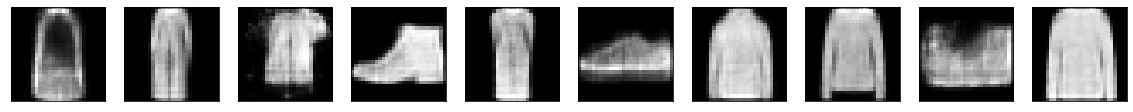

In [46]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(out[index], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
model.save_weights('./checkpoints/VAE_tensorflow')

In [43]:
model.load_weights('./checkpoints/VAE_tensorflow')